In [10]:
import os
import numpy as np
import pandas as pd
import ocsmesh
from math import cos, asin, sqrt
import matplotlib.pyplot as plt

In [11]:
def station_distance(lat1, lon1, lat2, lon2):
    '''
    p is the factor to convert an angle expressed in degrees to
    radians: π/180 = 0.017453292519943295...\
    hav is the haversine calculated using the above formula\
    12742 is the diameter of the earth expressed in km, and is thus
    the value of 2𝑟 in the above formula.
    '''

    pvalue = 0.017453292519943295
    hav = 0.5 - cos((lat2 - lat1) * pvalue) / 2 + cos(lat1 * pvalue) * cos(
        lat2 * pvalue) * (1 - cos((lon2 - lon1) * pvalue)) / 2
    return 12742 * asin(sqrt(hav))

In [12]:
def find_nearest(df,mesh):
    max_dist = 3 # cutoff for distance between obs station and model station
    index_min_dist = []
    min_dist = []
    length = len(df)

    for obs_p in range(0, length):
        dist = []
        nearby_nodes = np.argwhere(
  (mesh.X.to_numpy() > (float(df.X[obs_p])-.3)) \
& (mesh.X.to_numpy() < (float(df.X[obs_p])+.3)) \
& (mesh.Y.to_numpy() > (float(df.Y[obs_p])-.3)) \
& (mesh.Y.to_numpy() < (float(df.Y[obs_p])+.3))
)
        if nearby_nodes.size > 0:
            for mod_p in nearby_nodes[:,0]:
                dvalue = station_distance(
                    mesh.Y.to_numpy()[int(mod_p)],
                    mesh.X.to_numpy()[int(mod_p)],
                    float(df.Y[obs_p]),
                    float(df.X[obs_p]))
                dist.append(dvalue)
            if np.nanmin(dist) <= max_dist:
                index_min_dist.append(int(nearby_nodes[dist.index(min(dist))]))
                min_dist.append(np.nanmin(dist))
            else:
                print(np.nanmin(dist))
                index_min_dist.append(np.nan)
                min_dist.append(np.nan)
            
            # print(
            #     'Nearest ofs station found: ', obs_p + 1, length)
        else:
            print("fail at: ", obs_p + 1, length)
            index_min_dist.append(np.nan)
            min_dist.append(np.nan)

    return index_min_dist, min_dist

In [13]:
def scatter_r(df,var,out_dir):
    plt.figure(figsize=(5, 4))
    plt.scatter(df.r, df.elev, marker='+', c='g', s=20, linewidths=.75)
    
    # Add labels and title
    plt.xlabel('Correlation Coeff. (r)')
    plt.ylabel('Elevation (m)')
    # plt.title('Scatter Plot Example')
    
    # plt.axvline(0, linestyle=':', color='k',linewidth=.8)
    plt.axvline(.3, linestyle=':', color='k',linewidth=.8)
    plt.axvline(.5, linestyle=':', color='k',linewidth=.8)
    plt.axvline(.7, linestyle=':', color='k',linewidth=.8)
    plt.axvline(1, color='b', linestyle='--',linewidth=1)
    
    plt.axhline(0, linestyle=':', color='k',linewidth=.8)
    # plt.axvline(datetime.datetime(2021, 8, 30), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 9, 3), linestyle=':', color='k')
    
    plt.xticks([-1, .3, .5, .7, 1])
    plt.xlim(-1, 1.1)
    # plt.ylim(-10, 10)
    # plt.set_xticklabels(['A', 'B', 'C', 'D'])
    
    # Show the plot
    
    plt.tight_layout()
    plt.savefig(out_dir+f'{var}_scatter_r.jpeg', dpi=300)

def scatter_norm_stadev(df,var,out_dir):
    plt.figure(figsize=(5, 4))
    plt.scatter(df.norm_stadev, df.elev, marker='+', c='g', s=20, linewidths=.75)
    
    # Add labels and title
    plt.xlabel('Norm. Stand. Dev.')
    plt.ylabel('Elevation (m)')
    # plt.title('Scatter Plot Example')
    
    plt.axvline(0, linestyle=':', color='k',linewidth=.8)
    plt.axvline(.4, linestyle=':', color='k',linewidth=.8)
    plt.axvline(.8, linestyle=':', color='k',linewidth=.8)
    plt.axvline(1, color='b', linestyle='--',linewidth=1)
    plt.axvline(1.2, linestyle=':', color='k',linewidth=.8)
    plt.axvline(1.6, linestyle=':', color='k',linewidth=.8)
    # plt.axvline(2, linestyle=':', color='k')
    
    plt.axhline(0, linestyle=':', color='k',linewidth=.8)
    # plt.axvline(datetime.datetime(2021, 8, 30), linestyle=':', color='k')
    # plt.axvline(datetime.datetime(2021, 9, 3), linestyle=':', color='k')
    
    plt.xticks([0, .4, .8, 1.2, 1.6, 2])
    plt.xlim(0, 2)
    # plt.ylim(-10, 10)
    # plt.set_xticklabels(['A', 'B', 'C', 'D'])
    
    # Show the plot
    plt.tight_layout()
    plt.savefig(out_dir+f'{var}_scatter_normstadev.jpeg', dpi=300)


In [14]:
path=r"C:\Users\Felicio.Cassalho\Work\Modeling\OCSMesh_Paper\STOFS3D_RUNS/"
mesh = ocsmesh.Mesh.open(path+'R08/hgrid.gr3', crs=4326)

In [15]:
mesh = pd.DataFrame(
                    {
                        "X":mesh.vert2['coord'][:,0],
                        "Y":mesh.vert2['coord'][:,1],
                        "Z":[i[0] for i in mesh.value],
                    })

In [16]:
path = r"C:\Users\Felicio.Cassalho\Work\Python_Development\ofs_dps\data\skill\stats/"
files = os.listdir(path)

In [17]:
out_dir = r"C:\Users\Felicio.Cassalho\Work\Literature\OCSMesh_Paper\Figures\Figure6/"

started:  skill_stofs3d_currents_None


C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_24304\99677859.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_min_dist.append(int(nearby_nodes[dist.index(min(dist))]))


finished:  skill_stofs3d_currents_None
started:  skill_stofs3d_salinity_None


C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_24304\99677859.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_min_dist.append(int(nearby_nodes[dist.index(min(dist))]))


finished:  skill_stofs3d_salinity_None
started:  skill_stofs3d_water_level_None


C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_24304\99677859.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_min_dist.append(int(nearby_nodes[dist.index(min(dist))]))


finished:  skill_stofs3d_water_level_None
started:  skill_stofs3d_water_temperature_None


C:\Users\Felicio.Cassalho\AppData\Local\Temp\1\ipykernel_24304\99677859.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index_min_dist.append(int(nearby_nodes[dist.index(min(dist))]))


finished:  skill_stofs3d_water_temperature_None


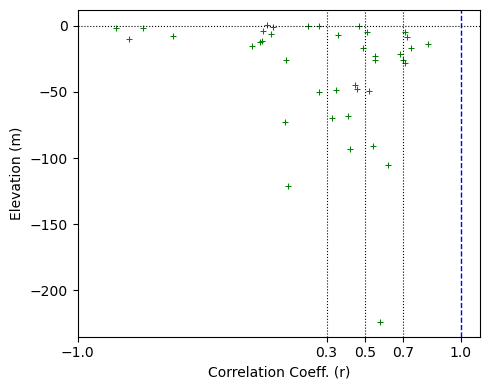

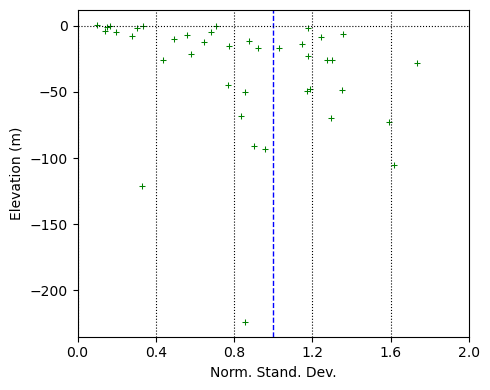

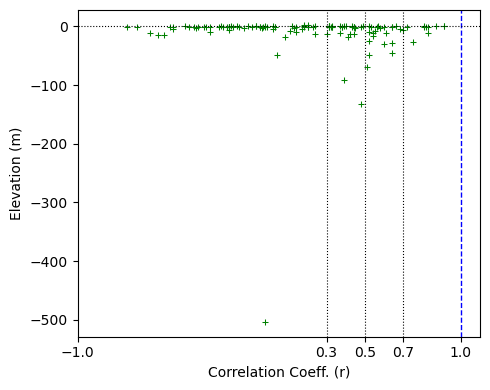

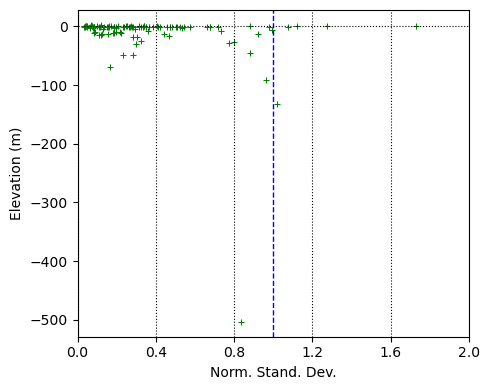

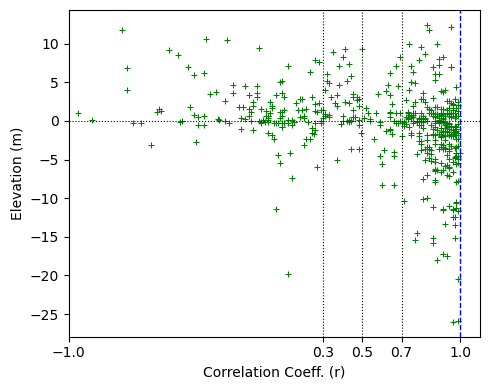

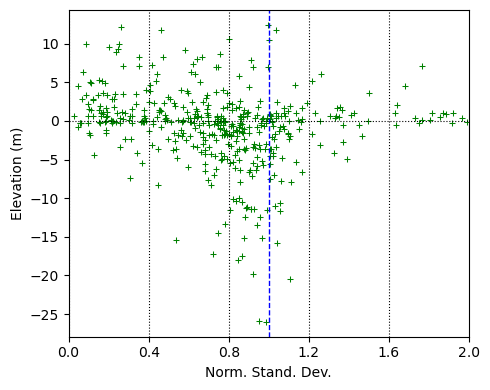

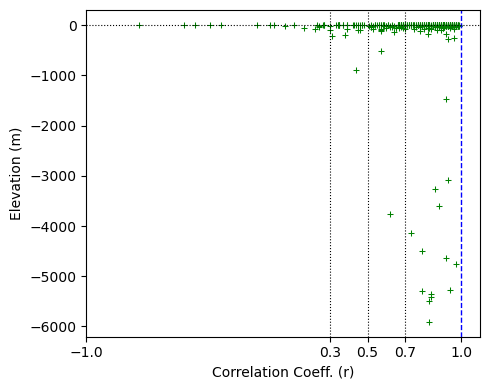

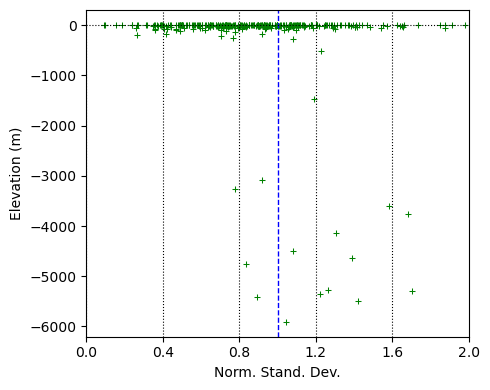

In [18]:
for f in files:
    model,var=f.split("_")[1],f.split(".")[0]
    print("started: ",var)

    df = pd.read_csv(path+f, sep=',')
    df = df[['ID', 'X', 'Y', 'r', 'norm_stadev']]

    idx_near=find_nearest(df,mesh)

    df['elev'] = mesh['Z'][idx_near[0]].to_numpy()
    df = df[~(df == -999).any(axis=1)]

    scatter_r(df,var,out_dir)
    scatter_norm_stadev(df,var,out_dir)
    print("finished: ",var)